# What you learned:

1. Improve Constrast
2. Restored images
3. Applied filters
4. Rotated, flipeed, and resized
5. Segemented: supervised and unsupervised
6. Applied morphological operators
7. Created and reduced noise
8. Detected edges, corners and faces

# Course Description
Images are everywhere! We live in a time where images contain lots of information, which is sometimes difficult to obtain. This is why image pre-processing has become a highly valuable skill, applicable in many use cases. In this course, you will learn to process, transform, and manipulate images at your will, even when they come in thousands. You will also learn to restore damaged images, perform noise reduction, smart-resize images, count the number of dots on a dice, apply facial detection, and much more, using scikit-image. After completing this course, you will be able to apply your knowledge to different domains such as machine learning and artificial intelligence, machine and robotic vision, space and medical image analysis, retailing, and many more. Take the step and dive into the wonderful world that is computer vision!

# CHAPTER 1
## Introducing Image Processing and scikit-image

Jump into digital image structures and learn to process them! Extract data, transform and analyze images using NumPy and Scikit-image. With just a few lines of code, you will convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

# RGB to grayscale
In this exercise you will load an image from scikit-image module data and make it grayscale, then compare both of them in the output.

We have preloaded a function show_image(image, title='Image') that displays the image using Matplotlib. You can check more about its parameters using ?show_image() or help(show_image) in the console.



In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
def show_image(image, title='Image', cmap_type='gray'):
  figsize= (20,20)
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

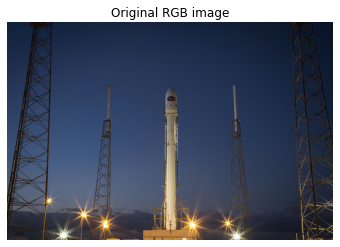

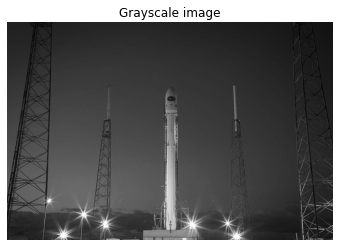

In [ ]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# Flipping out
As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the show_image() function.
NumPy is already imported as np.

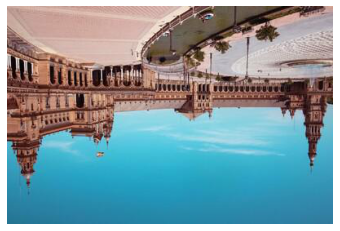

In [ ]:
import imageio as iio
 
# read an image
flipped_seville = iio.imread("sevilleup.jpg")
 
# write it in a new format
iio.imwrite("sevilleup.jpg", flipped_seville)

show_image(flipped_seville, '')

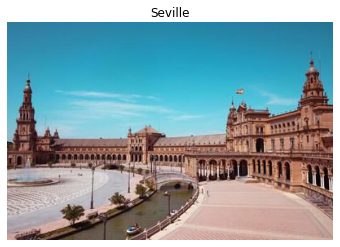

In [ ]:
import numpy as np
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

# Histograms
In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:


Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.

Matplotlib is preloaded as plt and Numpy as np.

Remember that if we want to obtain the green color of an image we would do the following: 

green = image[:, :, 1]

(256, 256, 3)


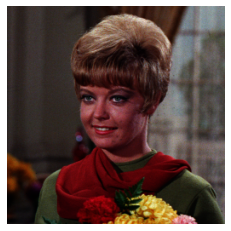

In [ ]:
from PIL import Image
img = Image.open('4.1.01.tiff')
img.show()
image= np.array(img)
print(image.shape)
show_image(img, "")

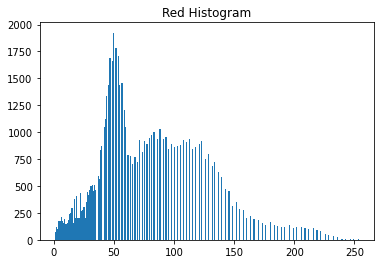

In [ ]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram') 
plt.show()
# Quite reddish because it has a wide and large distribution of bright red pixels, from 0 to around 150

# Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.

You'll see the resulting binarized image when using the show_image() function, previously explained.


Remember we have to turn colored images to grayscale. For that we will use the rgb2gray() function learned in previous video. Which has already been imported for you.

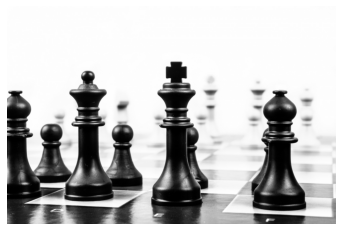

In [ ]:
import imageio as iio
 
# read an image
chess_pieces_image = iio.imread("bw.jpg")
 
# write it in a new format
iio.imwrite("bw.jpg", chess_pieces_image)


show_image(chess_pieces_image, '')

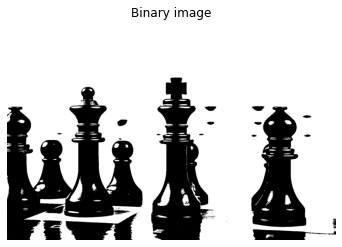

In [ ]:
# Import modules, make pic grey, obtain threshold value, apply threshold to image 

# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

# When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need

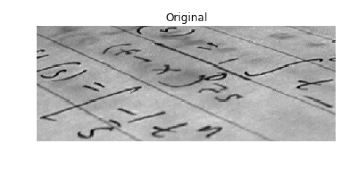

In [ ]:
import imageio as iio
 
# read an image
page_image = iio.imread("text_page_original.png")
 
# write it in a new format
iio.imwrite("text_page_original.png", page_image)


show_image(page_image, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


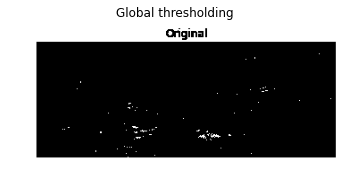

In [ ]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

page_image1= rgb2gray(page_image)
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image1)

# Obtain the binary image by applying global thresholding
binary_global = page_image1 > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

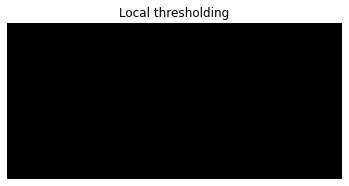

In [ ]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image1, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image1 > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

# Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

You will apply this function to this image, matplotlib.pyplot has been loaded as plt. Remember that you can use try_all_threshold() to try multiple global algorithms.

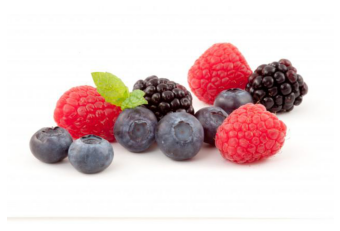

In [ ]:
import imageio as iio
 
# read an image
fruits_image = iio.imread("fruits.jpg")
 
# write it in a new format
iio.imwrite("fruits.jpg", fruits_image)


show_image(fruits_image, '')

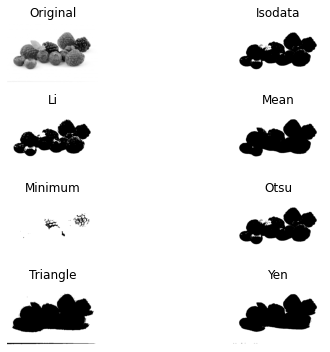

In [ ]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

# Yen and Mean look the best

# Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

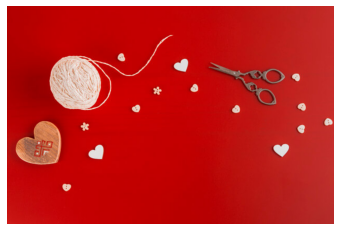

In [ ]:
import imageio as iio
 
# read an image
tools_image = iio.imread("shapes.jpg")
 
# write it in a new format
iio.imwrite("shapes.jpg", tools_image)


show_image(tools_image, '')

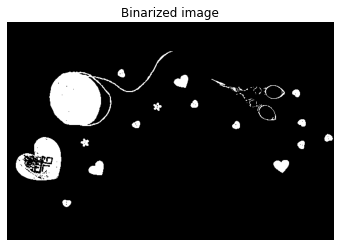

In [ ]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

# CHAPTER 2

## Filters, Contrast, Transformation and Morphology

You will learn to detect object shapes using edge detection filters, improve medical images with contrast enhancement and even enlarge pictures to five times its original size! You will also apply morphology to make thresholding more accurate when segmenting images and go to the next level of processing images with Python.

# Edge detection
In this exercise, you'll detect edges in an image by applying the Sobel filter.


The show_image() function has been already loaded for you.

Let's see if it spots all the figures in the image.

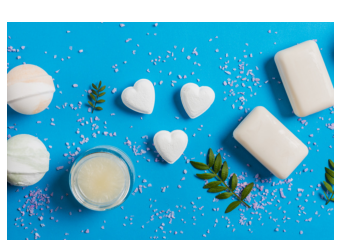

In [ ]:
import imageio as ilo

soaps_image= ilo.imread('soap_image.jpg')

show_image(soaps_image, " ")

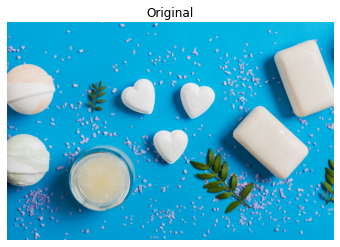

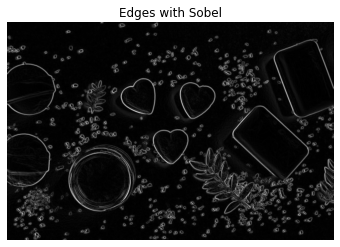

In [ ]:
# Import the color module
from skimage import color
from skimage.color import rgb2gray

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

# Blurring to reduce noise
In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

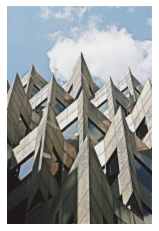

In [ ]:
building_image= ilo.imread('building_image.jpg')

show_image(building_image, "")

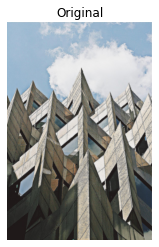

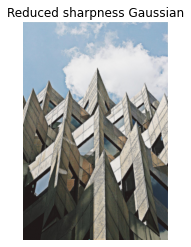

In [ ]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

# Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast. Remember we obtain the histogram by using the hist() function from Matplotlib, which has been already imported as plt

Contrast is np.max(image)-np.min(image)

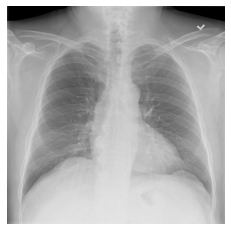

In [ ]:
chest_xray_image=ilo.imread('chest_xray_image.png')
show_image(chest_xray_image, "")

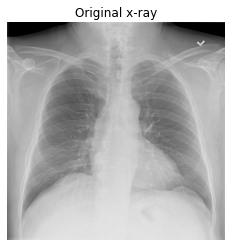

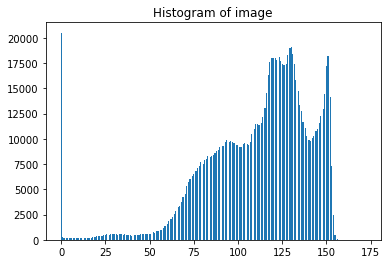

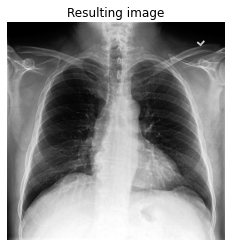

In [ ]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

# Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

For this we will use the normal or standard technique of Histogram Equalization

(512, 512)


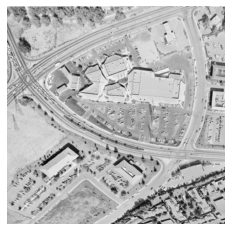

In [ ]:
import numpy as np
from PIL import Image
img = Image.open('image_aerial.tiff')
img.show()
image_aerial= np.array(img)
print(image_aerial.shape)
show_image(img, "")

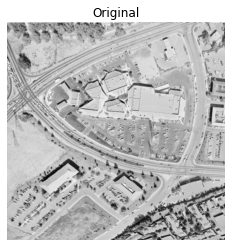

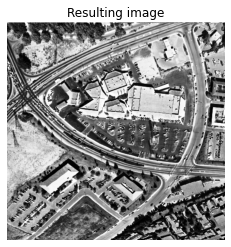

In [ ]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

# Let's add some impact and contrast
Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Something you could share with your friends on social media. Don't forget to use #ImageProcessingDatacamp as hashtag!

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.


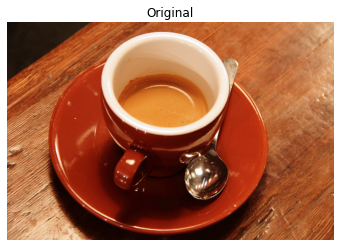

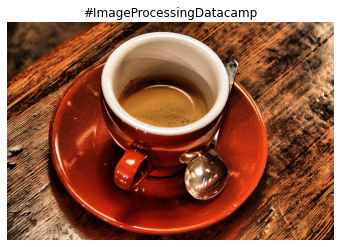

In [ ]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image, 'Original')
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

# Aliasing, rotating and rescaling
Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

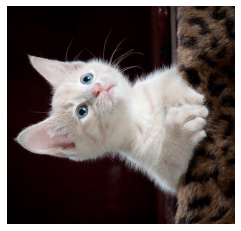

In [ ]:
image_cat= ilo.imread('image_cat.jpg')
show_image(image_cat, "")

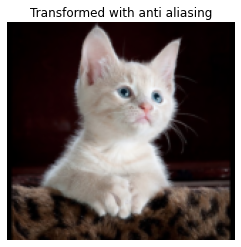

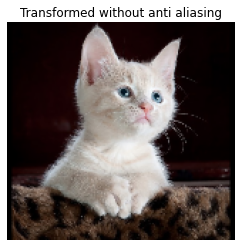

In [ ]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
# Rescale the cat_image to be 4 times smaller and apply the anti aliasing filter. 
# Set whether or not the image should be treated as multichannel (colored).
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

# Enlarging images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

You'll do this by rescaling the image of a rocket, that will be loaded from the data module.

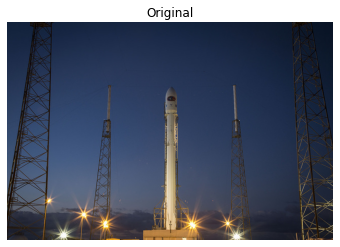

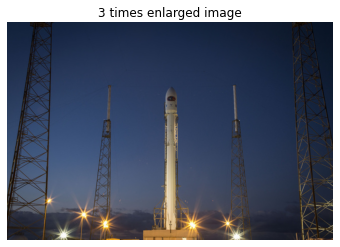

In [ ]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image, 'Original')
show_image(enlarged_rocket_image, "3 times enlarged image")

# Proportionally resizing
We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.



Remember that by looking at the shape of the image, you can know its width and height.

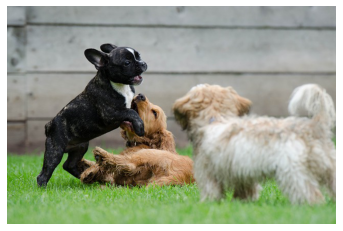

(423, 640, 3)


In [ ]:
dogs_banner= ilo.imread('dogs_banner.jpg')
dogs_banner= np.array(dogs_banner)
show_image(dogs_banner, "")
print(dogs_banner.shape)

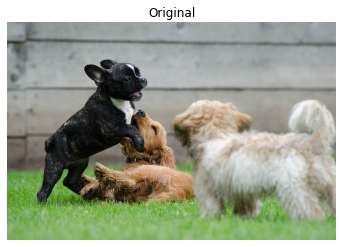

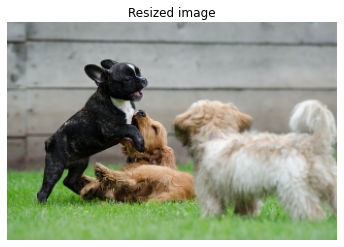

In [ ]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
# height determined by 1 number in array
# width 2nd number in array image.shape[1]
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

# Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.


As we can see it's the letter R, already binary, with some noise in it. It's already loaded as upper_r_image.

Apply the morphological operation that will discard the pixels near the letter boundaries.

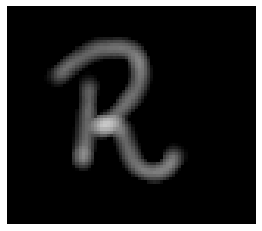

In [ ]:
upper_r_image= ilo.imread('r5.png')
show_image(upper_r_image, '')

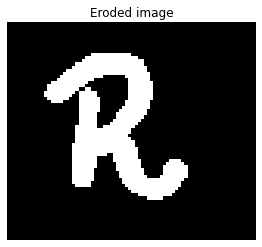

In [ ]:
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
# image shown is eroded image
show_image(upper_r_image, 'Eroded image')
# show_image(eroded_image_shape)

# Improving thresholded image

 In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.


This operation, in a way, expands the objects in the image.

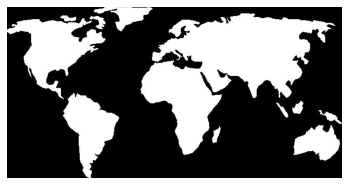

In [ ]:
world_image= ilo.imread('world_image_binary.jpg')
show_image(world_image, "")

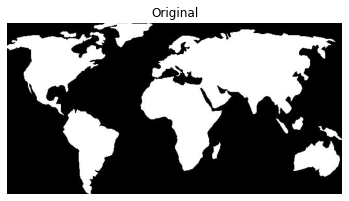

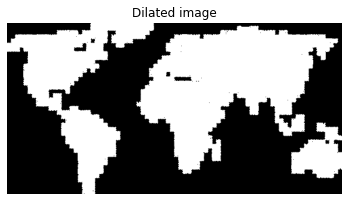

In [ ]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')

# CHAPTER 3

## Image restoration, Noise, Segmentation and Contours

So far, you have done some very cool things with your image processing skills! In this chapter, you will apply image restoration to remove objects, logos, text, or damaged areas in pictures! You will also learn how to apply noise, use segmentation to speed up processing, and find elements in images by their contours.

# Let's restore a damaged image
In this exercise, we'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.


We'll work on an image from the data module, obtained by data.astronaut(). Some of the pixels have been replaced with 0s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 0s turns them totally black. The defective image is saved as an array called defect_image.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas. This mask is preloaded as mask.

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

(539, 542, 4)


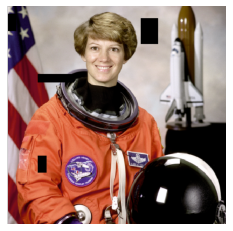

In [ ]:
# create mask function
def get_mask(image):
  ''' Creates mask with four defect regions '''
  mask = np.zeros(image.shape[:-1])
  mask[20:60, 0:20] = 1
  mask[160:180, 70:155] = 1
  mask[30:90, 310:350] = 1
  mask[350:390, 70:90] = 1
  return mask

from PIL import Image
defect_image= Image.open('damaged_astronaut.png')
defect_image.show()
defect_image= np.array(defect_image)
print(defect_image.shape)
show_image(defect_image, "")

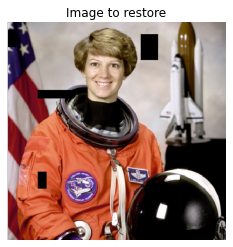

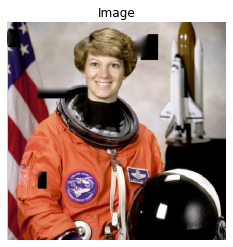

In [ ]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image)

# Removing logos
As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

(296, 512, 3)


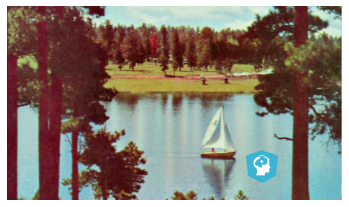

In [ ]:
from PIL import Image
img = Image.open('4.2.06_w_logo_2_2.png')
img.show()
image_with_logo= np.array(img)
print(image_with_logo.shape)
show_image(img, "")

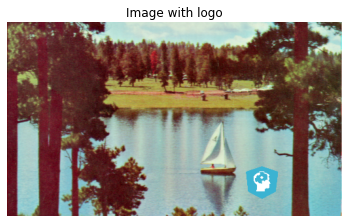

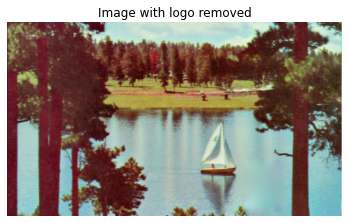

In [ ]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, 
                                                mask, 
                                                multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

# Let's make some noise!
In this exercise, we'll practice adding noise to a fruit image.

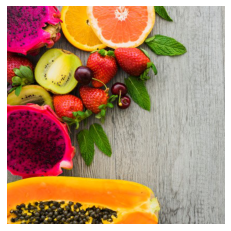

In [ ]:
from PIL import Image
fruit_image= Image.open('fruits_square.jpg')
fruit_image= np.array(fruit_image)
show_image(fruit_image, '')

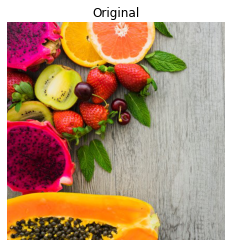

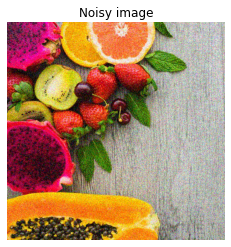

In [ ]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

# Reducing noise
We have a noisy image that we want to improve by removing the noise in it.


Use total variation filter denoising to accomplish this.

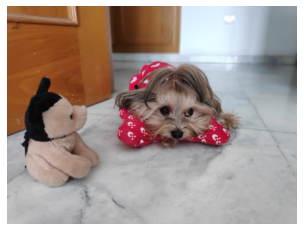

In [ ]:
noisy_image= Image.open('miny.jpeg')
noisy_image= np.array(noisy_image)
show_image(noisy_image, "")

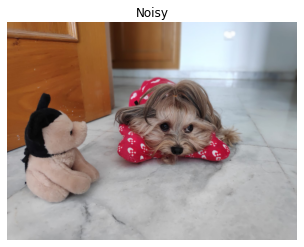

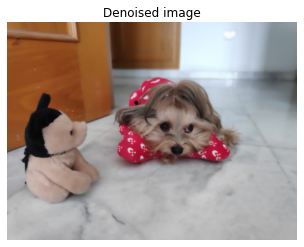

In [ ]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

# Reducing noise while preserving edges
In this exercise, you will reduce the noise in this landscape picture.

Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.

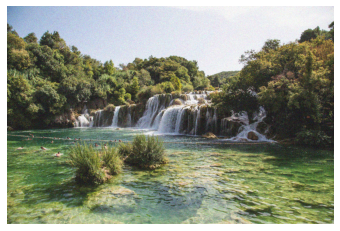

In [ ]:
landscape_image= Image.open('noise-noisy-nature.jpg')
landscape_image= np.array(landscape_image)
show_image(landscape_image, "")

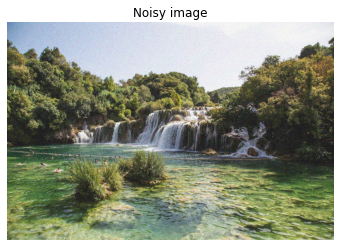

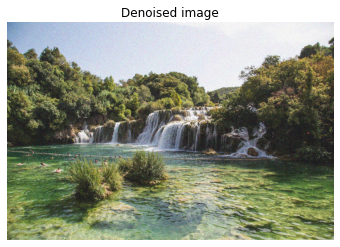

In [ ]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral 

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

# Superpixel segmentation
In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from  pixels down to  regions.

The show_image() function has been preloaded for you as well.

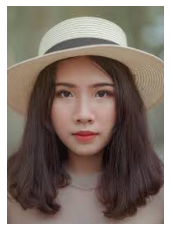

(265, 191, 3)

In [ ]:
from PIL import Image
face_image= np.array(Image.open('chinese.jpg'))
show_image(face_image, "")
face_image.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()


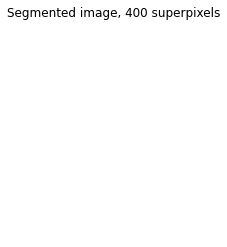

In [ ]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

# Contouring shapes
In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!


Remember you can use the find_contours() function from the measure module, by passing the thresholded image and a constant value.

In [ ]:
def show_image_contour(image, contours):
  plt.figure()
  for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=3) 
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

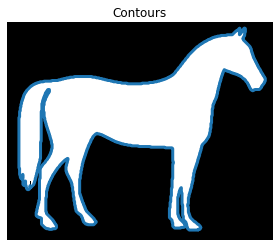

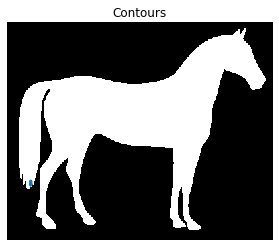

In [ ]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

# Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dice loaded as image_dice and determine what number was rolled for each dice.


In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

color, measure and filters modules are already imported so you can use the functions to find contours and apply thresholding.

We also import the io module to load the image_dice from local memory, using imread. Read more here.

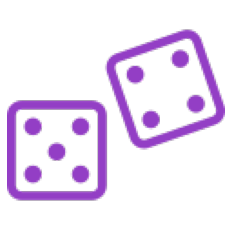

In [ ]:
import skimage.io

image_dice= skimage.io.imread('dices.png')
show_image(image_dice, "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


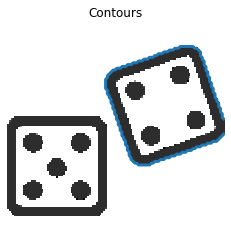

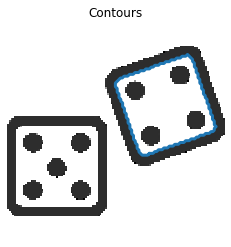

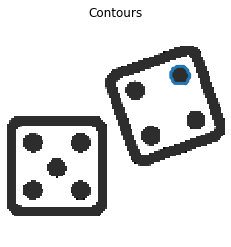

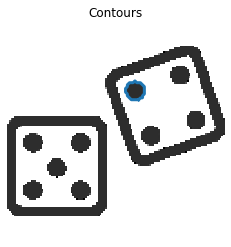

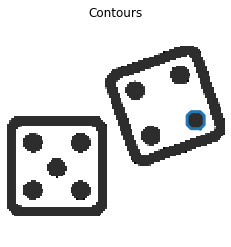

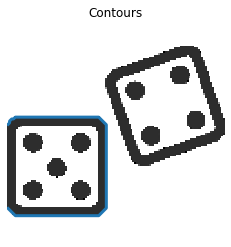

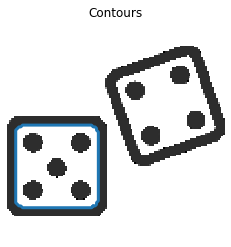

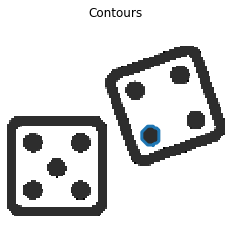

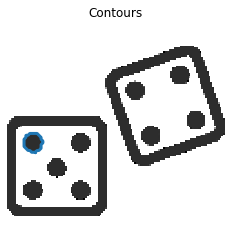

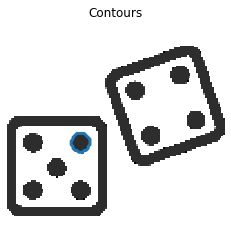

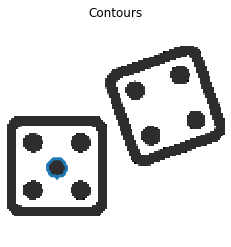

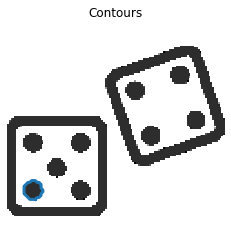

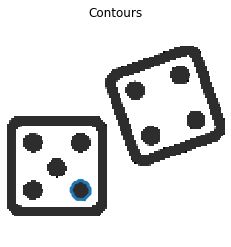

In [ ]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage import measure

# first grayscale image
image_dice= rgb2gray(image_dice)

# obtain optimial threshold value
thresh= threshold_otsu(image_dice)

# Apply thresholding
binary= image_dice > thresh

# Find contours at constant value of .8
contours= measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dice, contours)

# Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as contours.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib.

In [ ]:
def show_image_contour(image, contours):
  plt.figure()
  for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=5, color='green')
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()


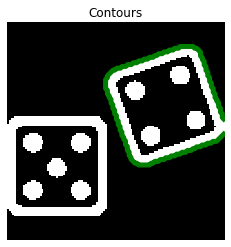

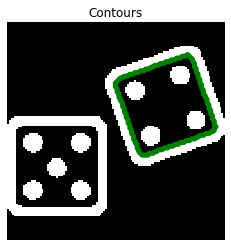

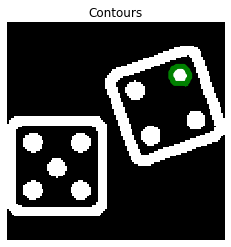

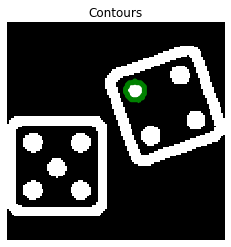

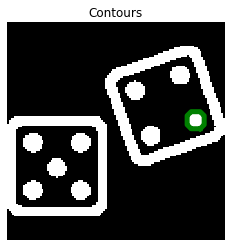

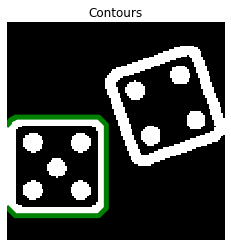

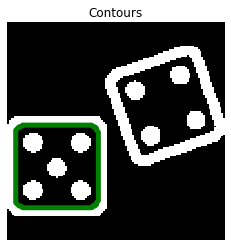

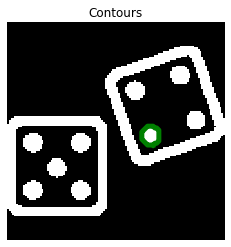

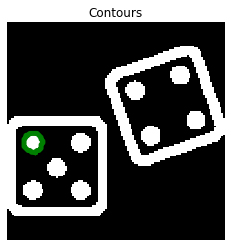

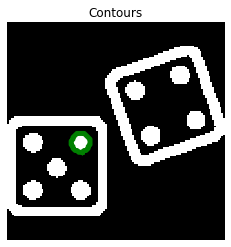

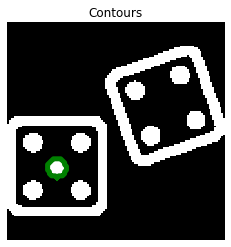

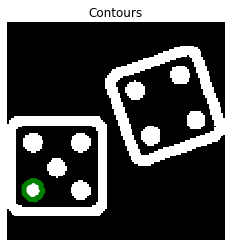

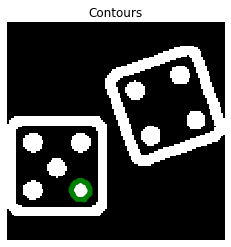

Dice's dots number: 9. 


In [ ]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

# CHAPTER 4
## Advanced Operations, Detecting Faces and Features
After completing this chapter, you will have a deeper knowledge of image processing as you will be able to detect edges, corners, and even faces! You will learn how to detect not just front faces but also face profiles, cat, or dogs. You will apply your skills to more complex real-world applications. Learn to master several widely used image processing techniques with very few lines of code!

# Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

The color module has already been preloaded for you.

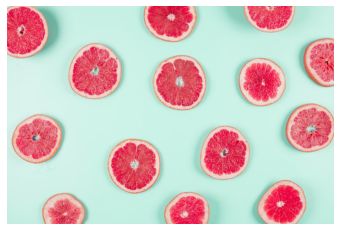

In [ ]:
from PIL import Image
grapefruit= np.array(Image.open('toronjas.jpg'))
show_image(grapefruit, "")

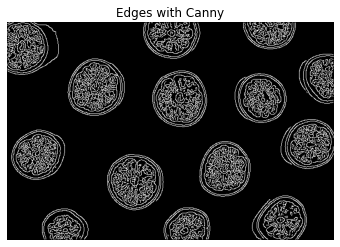

In [ ]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

# Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the canny() function.

Grapefruits
Image preloaded as grapefruit.
The show_image has already been preloaded.

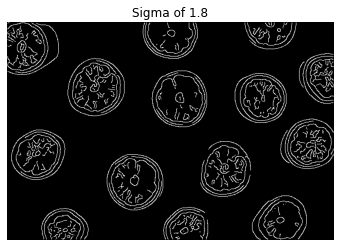

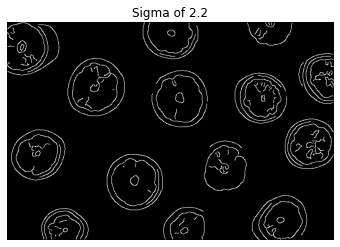

In [ ]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")


# Perspective
In this exercise, you will detect the corners of a building using the Harris corner detector. The threshold_rel parameter will specify the minimum intensity of peaks.

The functions show_image() and show_image_with_corners() have already been preloaded for you. As well as the color module for converting images to grayscale.



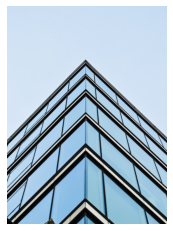

In [ ]:
def show_image_with_corners(image, coords, title="Corners detected"):
  plt.figure(figsize=(12, 10))
  plt.imshow(image, interpolation='nearest', cmap='gray')   
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=35)  
  plt.axis('off')  
  plt.show()
  plt.close()

building_image= np.array(Image.open('corners_building_top.jpg'))
show_image(building_image, "")

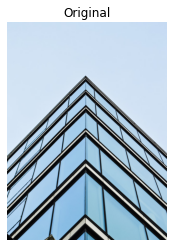

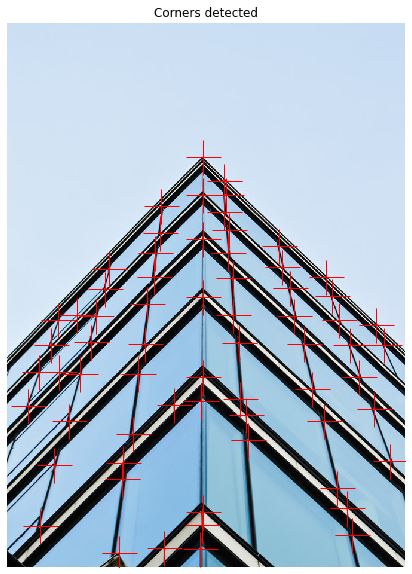

In [ ]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

# Less corners
In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function. The threshold_rel parameter will specify the minimum intensity of peaks.


The functions show_image(), show_image_with_corners() and required packages have already been preloaded for you. As well as all the previous code for finding the corners. The Harris measure response image obtained with corner_harris() is preloaded as measure_image.

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


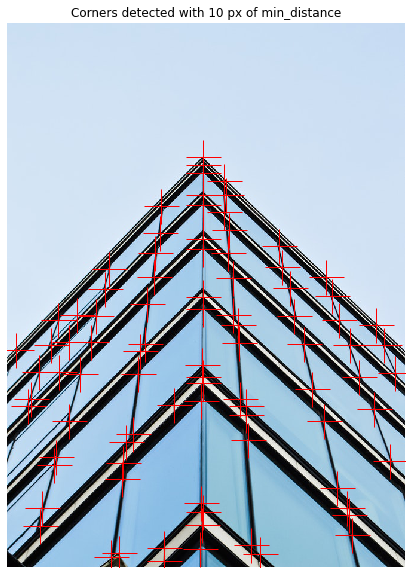

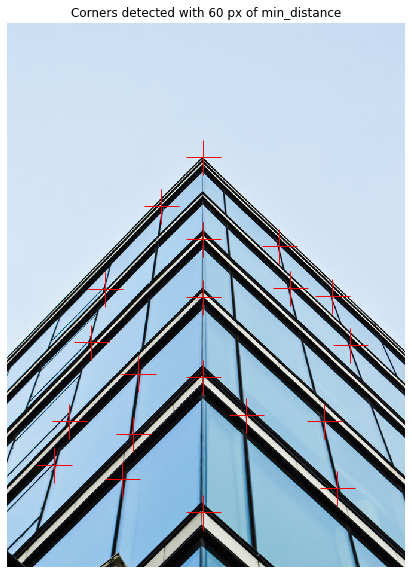

In [ ]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

# Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.

The Cascade of classifiers class from feature module has been already imported. The same is true for the show_detected_face() function, that is used to display the face marked in the image and crop so it can be shown separately.

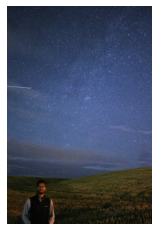

In [12]:
import matplotlib.patches as patches

def show_detected_face(result, detected, title="Face image"):
  plt.figure()   
  plt.imshow(result)  
  img_desc = plt.gca()   
  plt.set_cmap('gray')
  plt.title(title)  
  plt.axis('off')
  for patch in detected:
    img_desc.add_patch(patches.Rectangle((patch['c'], patch['r']), patch['width'], patch['height'], fill=False, color='r', linewidth=2))
    plt.show() 
    crop_face(result, detected)

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

night_image= np.array(Image.open('face_det3.jpg'))
show_image(night_image, "")

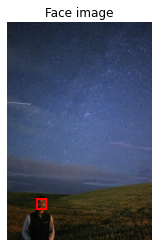

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


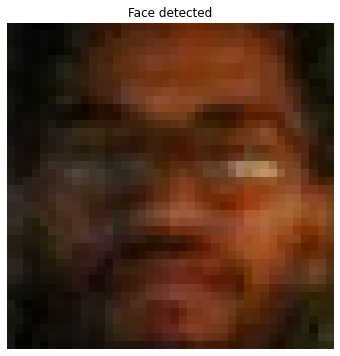

In [13]:
from skimage.feature import Cascade
from skimage import data
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

# Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

The Cascade of classifiers class from feature module has already been imported, as well as the show_detected_face() function which is used to display the face marked in the image and crop it so it can be shown separately.

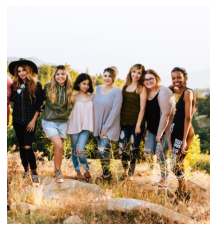

In [15]:
friends_image= np.array(Image.open('face_det_friends22.jpg'))
show_image(friends_image, "")

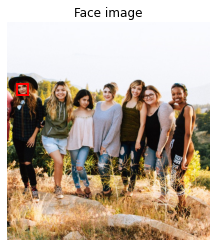

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


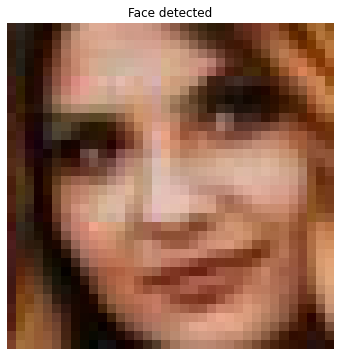

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


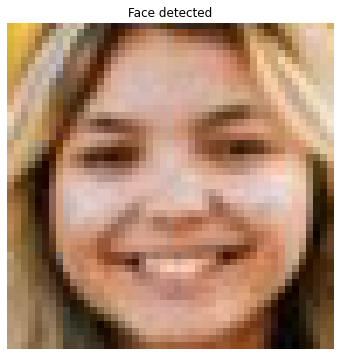

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


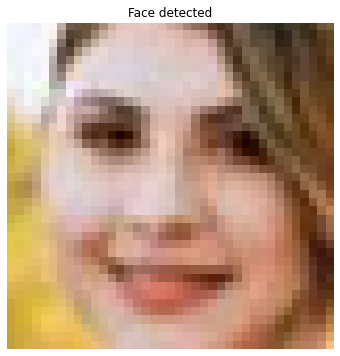

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


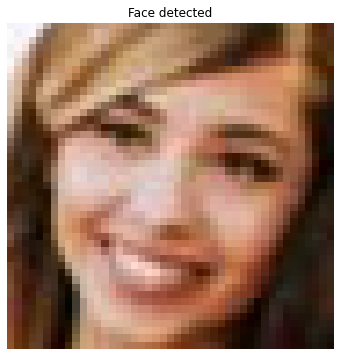

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


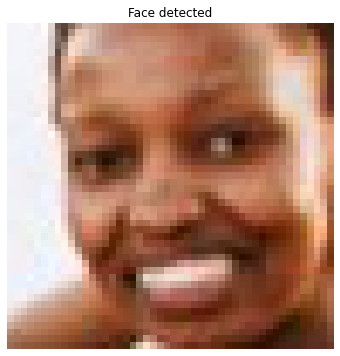

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


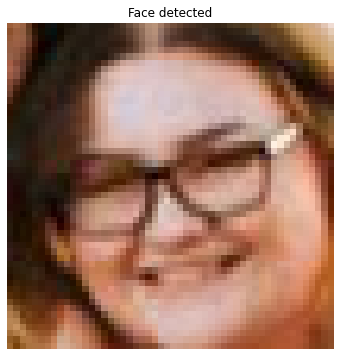

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


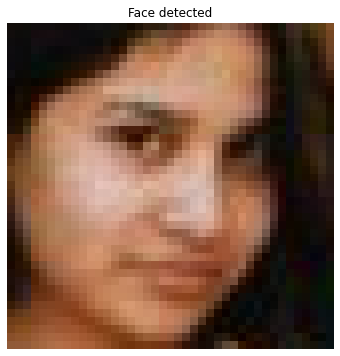

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


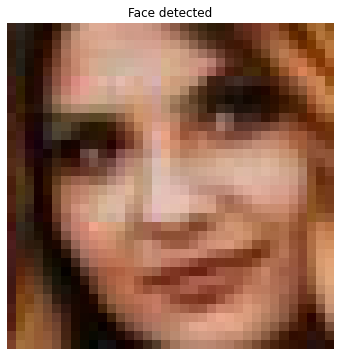

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


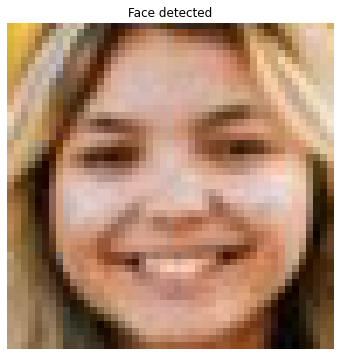

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


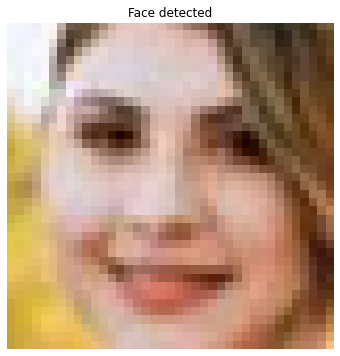

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


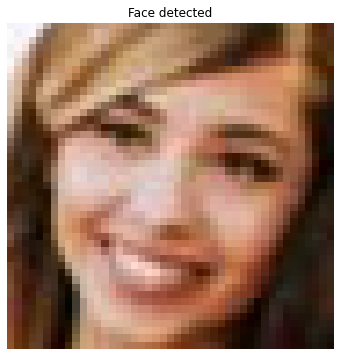

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


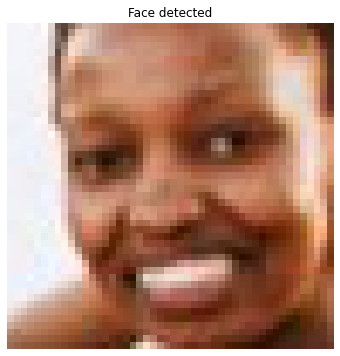

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


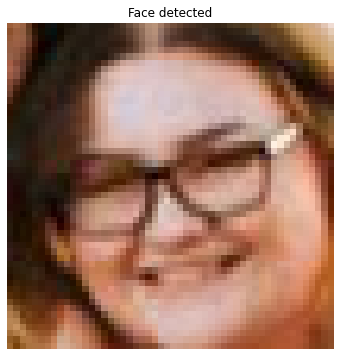

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


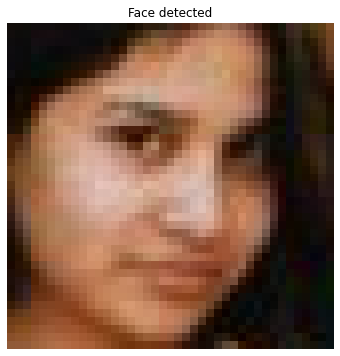

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


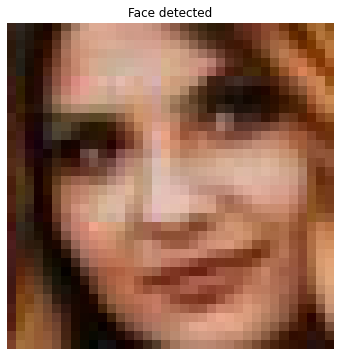

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


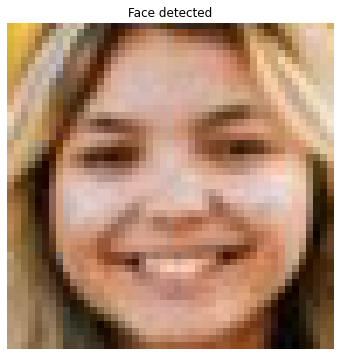

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


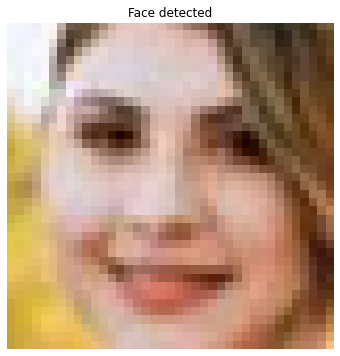

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


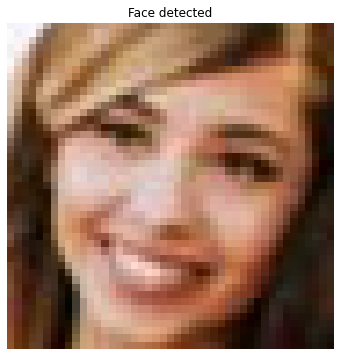

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


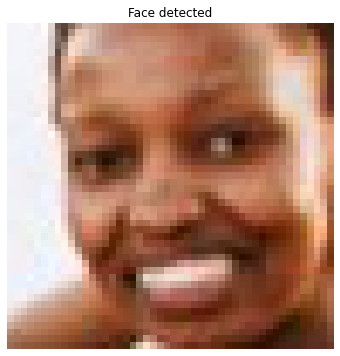

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


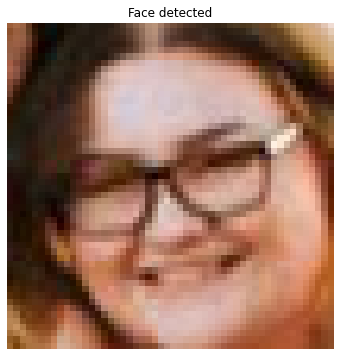

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


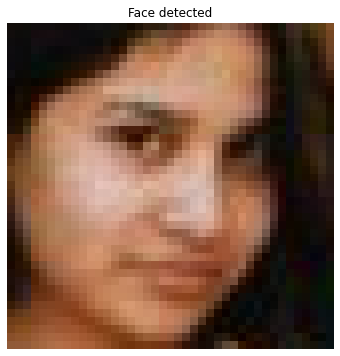

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


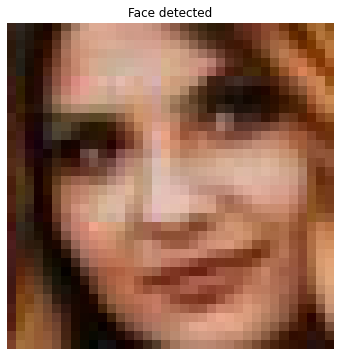

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


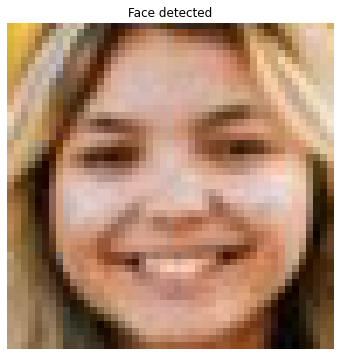

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


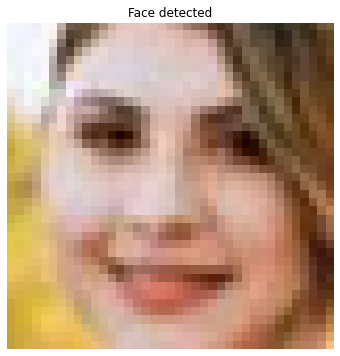

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


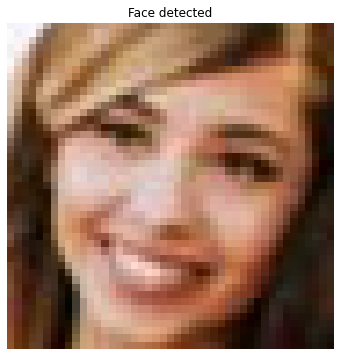

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


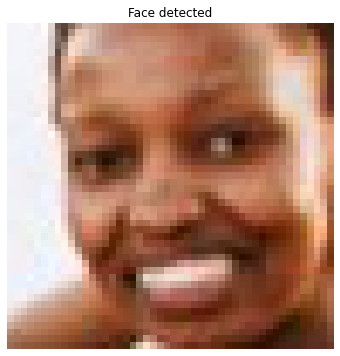

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


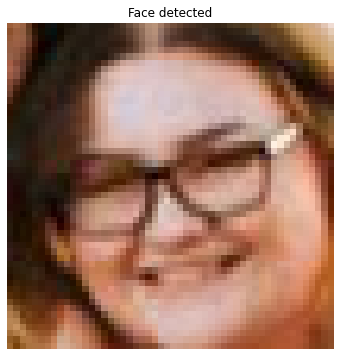

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


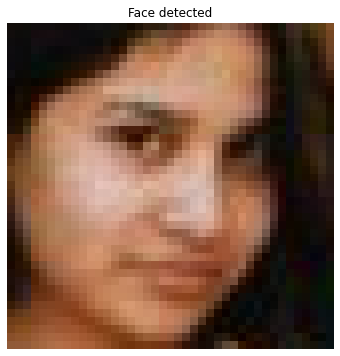

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


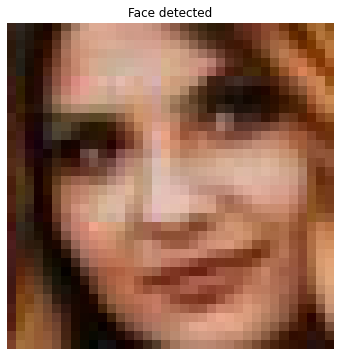

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


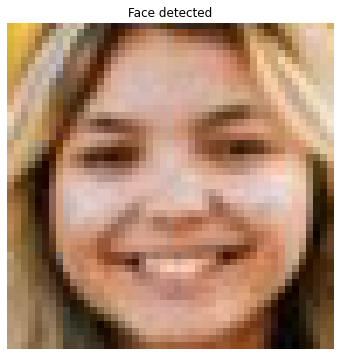

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


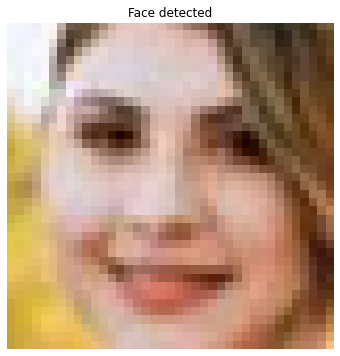

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


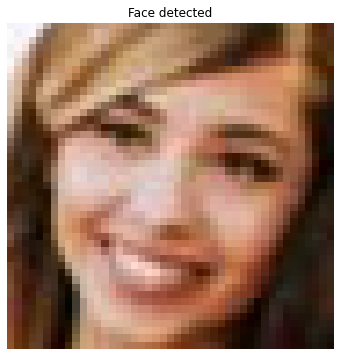

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


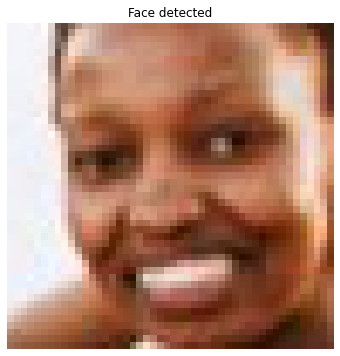

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


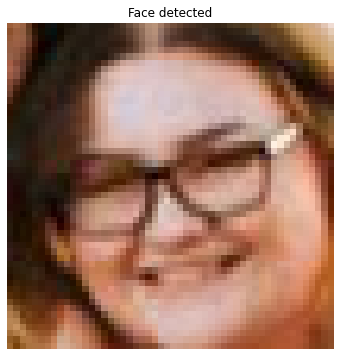

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


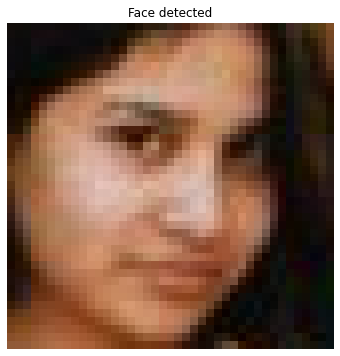

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


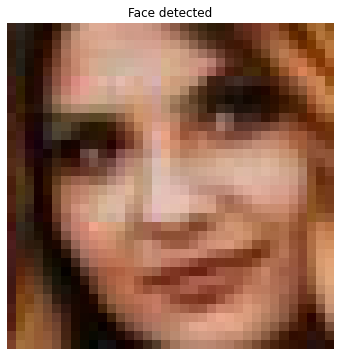

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


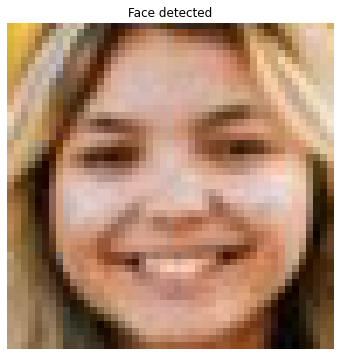

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


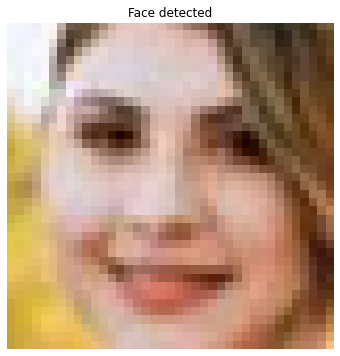

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


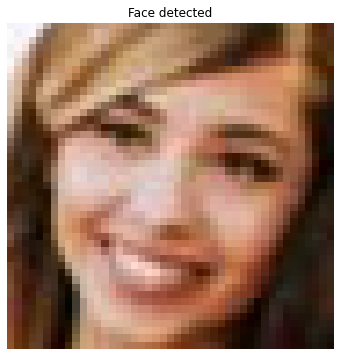

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


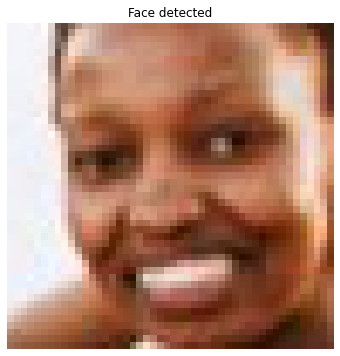

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


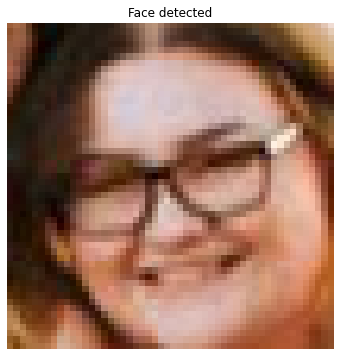

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


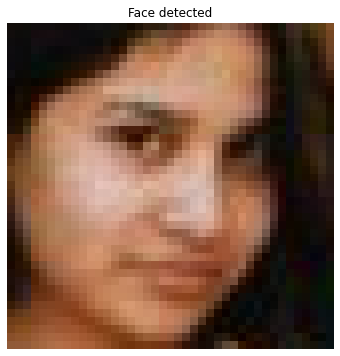

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


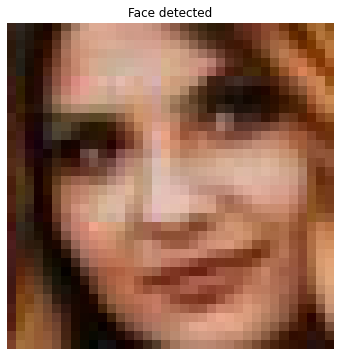

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


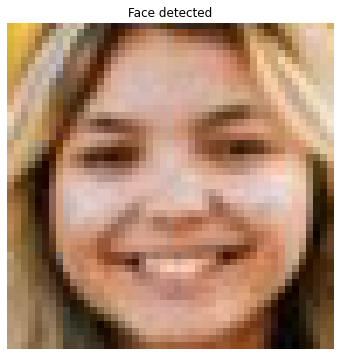

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


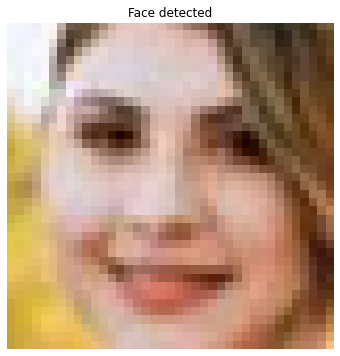

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


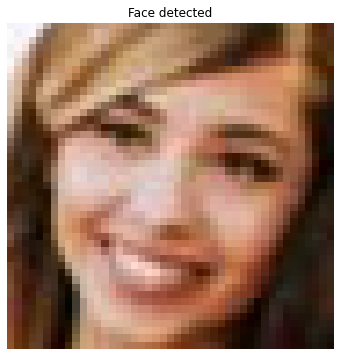

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


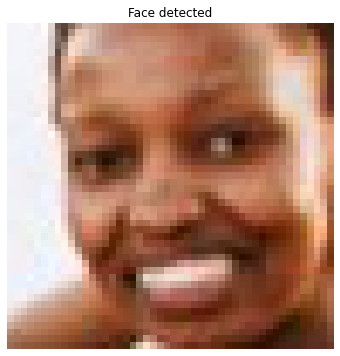

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


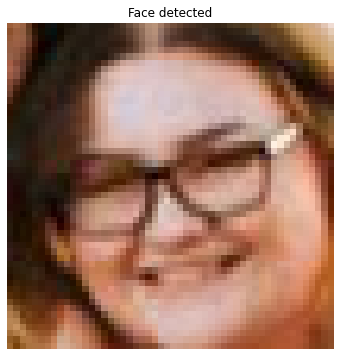

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


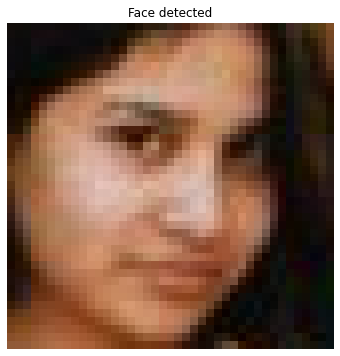

In [16]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

# Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the slic() function for segmentation, pre-process the image before passing it to the face detector.


The Cascade class, the slic() function from segmentation module, and the show_detected_face() function for visualization have already been imported. The detector is already initialized and ready to use as detector.

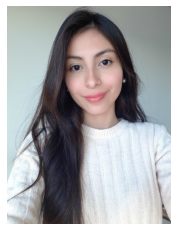

In [20]:
profile_image= np.array(Image.open('face.jpg'))
show_image(profile_image, "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


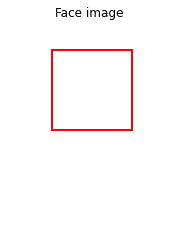

{'r': 113, 'c': 182, 'width': 322, 'height': 322}


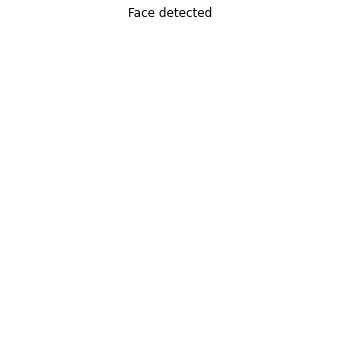

In [24]:
from skimage.segmentation import slic
from skimage.color import label2rgb
# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

# Privacy protection
Let's look at a real-world application of what you have learned in the course.

In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

You can use the gaussian filter for the blurriness.

The face detector is ready to use as detector and all packages needed have been imported.

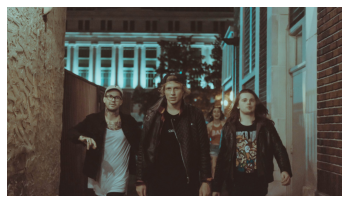

In [28]:
group_image= np.array(Image.open('face_det25.jpg'))
show_image(group_image, "")

#get face rectangle
def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face

#blurry face function
def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original

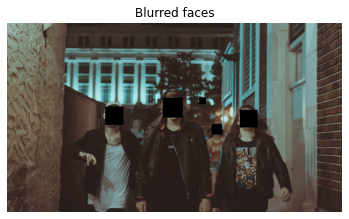

In [31]:
from skimage.filters import gaussian
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face =gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")

# Help Sally restore her graduation photo
You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.


You will be fixing the problems of this image by:

Rotating it to be uprightusing rotate()
Applying noise reduction with denoise_tv_chambolle()
Reconstructing the damaged parts with inpaint_biharmonic() from the inpaint module.
show_image() is already preloaded.

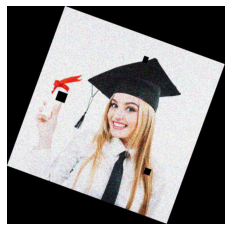

In [38]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

damaged_image= np.array(Image.open('sally_damaged_image.jpeg'))
show_image(damaged_image, "")

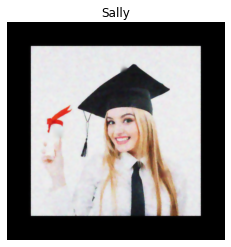

In [40]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result, "Sally")